In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from dateutil import rrule
from itertools import permutations

In [2]:
df = pd.read_csv("AAPL3.txt")
df.tail(20)

,<DATE>,<TIME>,<PRICE>,<VOLUME>,<ID>
23949475,10/07/19,15:59:44,203.240,100,15662
23949476,10/07/19,15:59:44,203.225,100,15663
23949477,10/07/19,15:59:45,203.220,100,15664
23949478,10/07/19,15:59:46,203.200,200,15665
23949479,10/07/19,15:59:50,203.190,110,15670
23949480,10/07/19,15:59:50,203.200,100,15671
23949481,10/07/19,15:59:51,203.165,100,15672
23949482,10/07/19,15:59:51,203.160,200,15673
23949483,10/07/19,15:59:52,203.160,100,15674
23949484,10/07/19,15:59:59,203.200,200,15679


In [3]:
df.columns = ["DATE", "TIME", "PRICE", "VOLUME", "ID"]

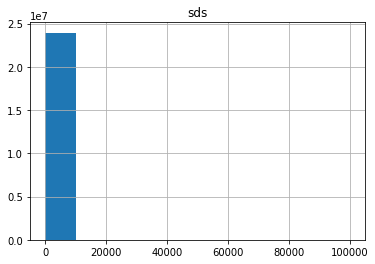

In [13]:
plt.title("sds")
df.VOLUME.hist(bins=10)
plt.show()

In [6]:
df["TIME"]=pd.to_timedelta(df['TIME'])
df["PRICE"] = df["PRICE"].astype(float)
df[["VOLUME", "ID"]] = df[["VOLUME", "ID"]].astype(int)

In [7]:
df['DATE'] = pd.to_datetime(df['DATE'],format="%d/%m/%y")

In [8]:
fecha="24-07-2018" #DD/MM/AAAA
date_tst = pd.Timestamp(fecha)

In [9]:
seg_data = df[df.DATE == fecha]

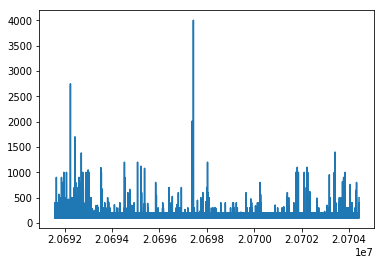

In [10]:
plt.plot(seg_data.VOLUME)

In [11]:
print(seg_data.query("VOLUME>5000"))

Empty DataFrame
Columns: [DATE, TIME, PRICE, VOLUME, ID]
Index: []


24-07-2018


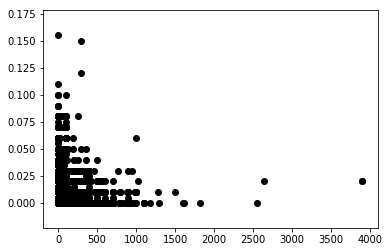

In [12]:
print(fecha)
plt.scatter(x=abs(seg_data.VOLUME.diff()), y=abs(seg_data.PRICE.diff()), color="black")
plt.show()

In [13]:
start_date = "23-07-2018"
start_date = pd.Timestamp(start_date)
days_after = 100

In [14]:
print("Day Code selected is:%i"%(start_date.weekday()==1))

Day Code selected is:0


In [15]:
list_dates = list(rrule.rrule(rrule.DAILY,count=days_after,dtstart=start_date,byweekday=range(0,5)))
df_seg = df[df.DATE.isin(list_dates)]

In [16]:
df_seg.head()

,DATE,TIME,PRICE,VOLUME,ID
20682491,2018-07-23,09:30:00,190.80,100,30
20682492,2018-07-23,09:30:00,190.63,100,32
20682493,2018-07-23,09:30:01,190.75,100,39
20682494,2018-07-23,09:30:01,190.76,200,40
20682495,2018-07-23,09:30:01,190.75,100,41


In [17]:
grouped_criteria=df_seg.groupby("DATE")
list_av_groups=list(grouped_criteria.groups.keys())

In [18]:
variable="DATE"
lenght = 10
main_parameter = "PRICE"
plot_size=(7,7)

DATE: 2018-07-23


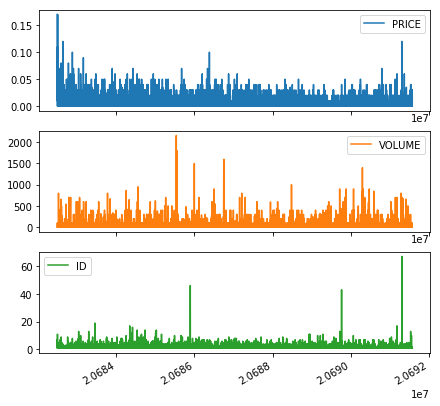

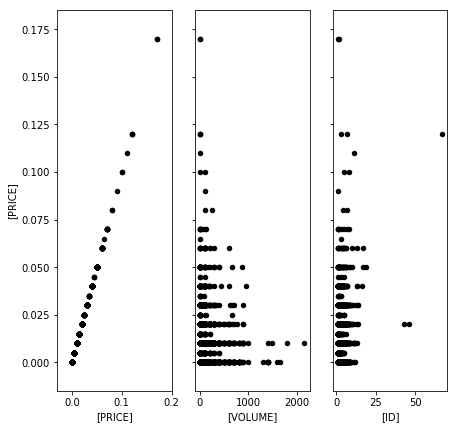

DATE: 2018-07-24


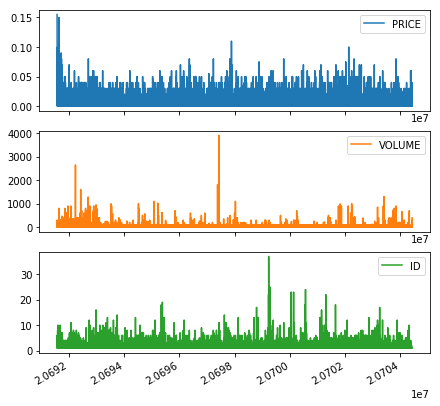

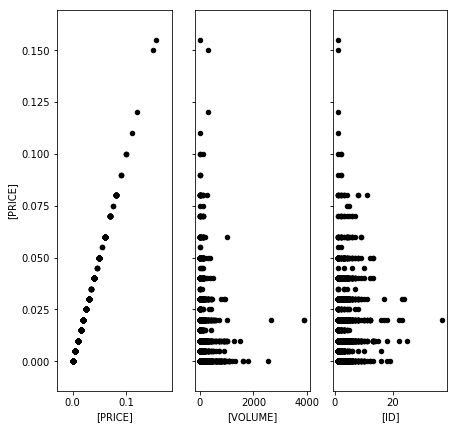

DATE: 2018-07-25


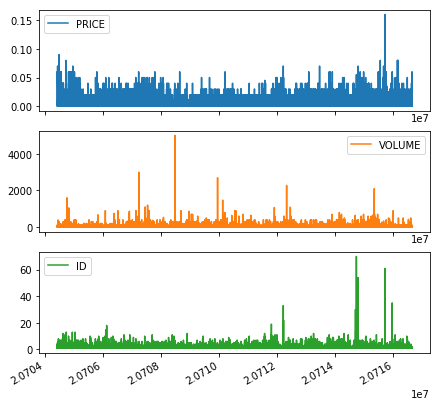

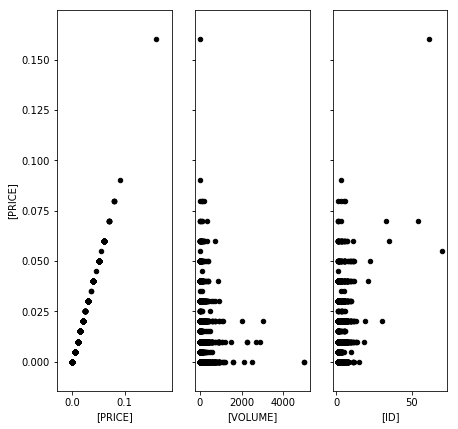

DATE: 2018-07-26


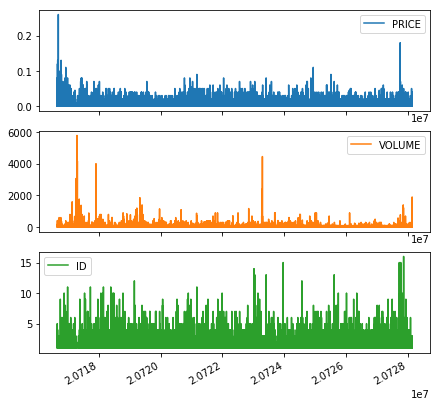

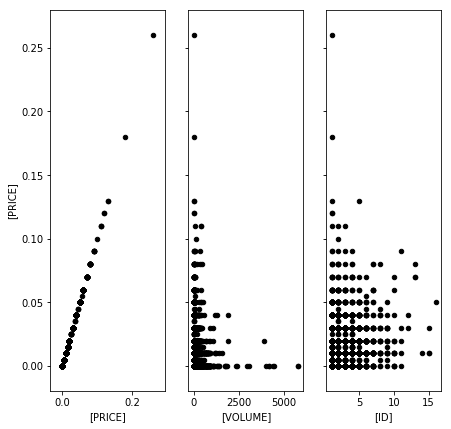

DATE: 2018-07-27


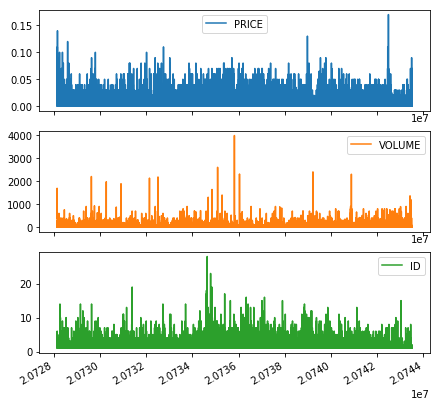

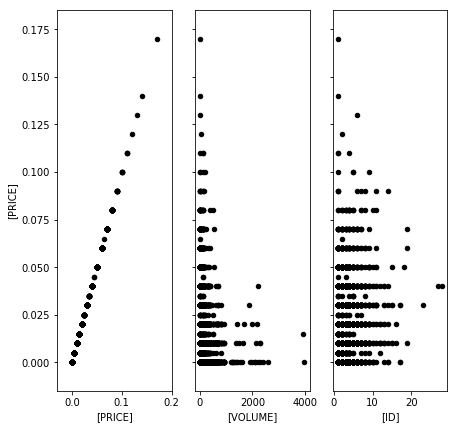

DATE: 2018-07-30


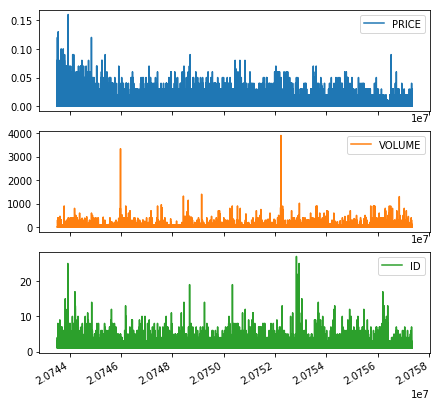

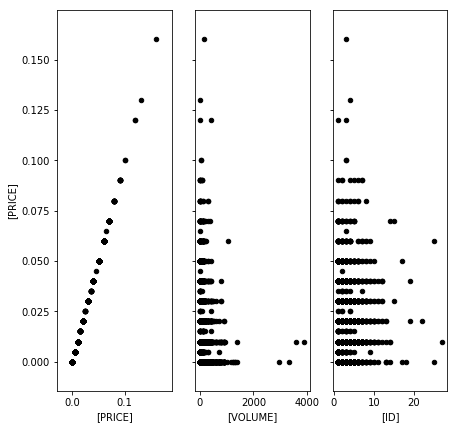

DATE: 2018-07-31


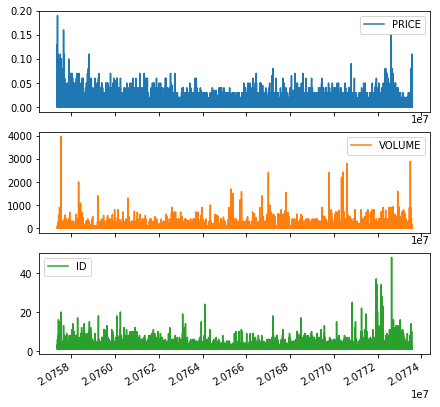

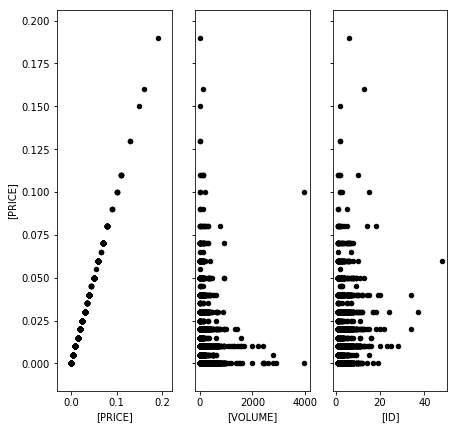

DATE: 2018-08-01


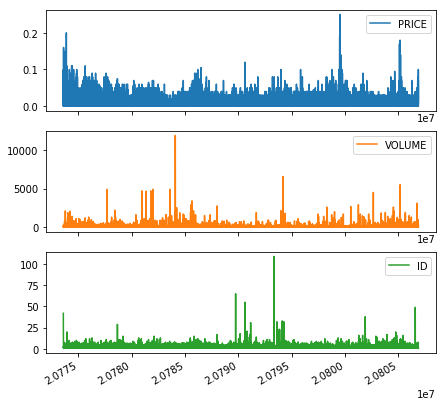

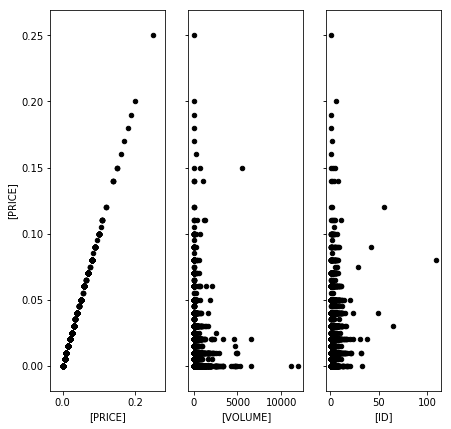

DATE: 2018-08-02


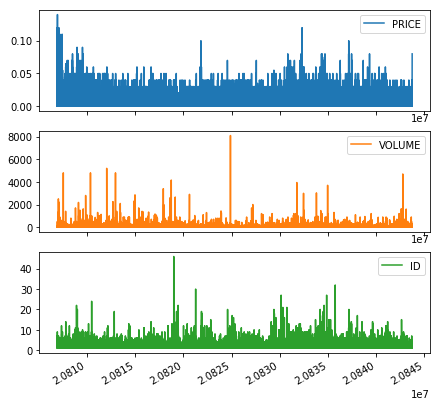

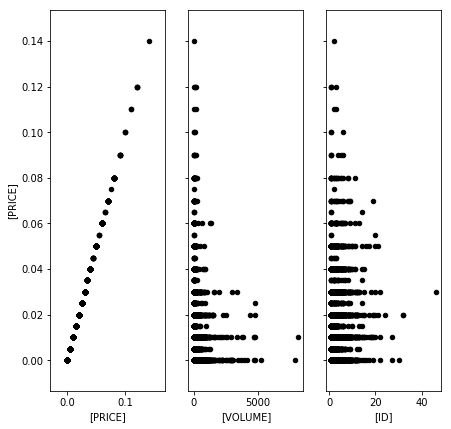

DATE: 2018-08-03


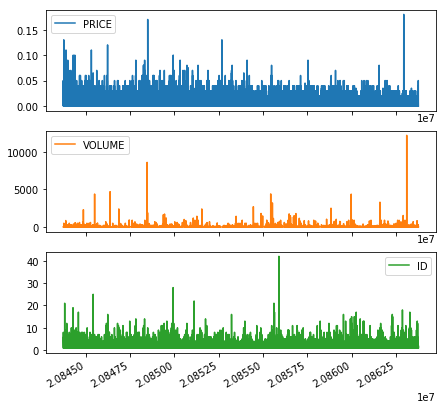

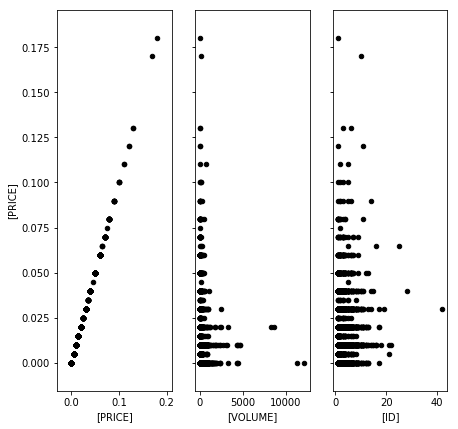

'Process finished'

In [19]:
def plotting(pandas,criteria,size,plotting_size,parameter):
    groupedpandas=pandas.groupby(criteria)
    datalist_criteria=list(groupedpandas.groups.keys())
    for group in datalist_criteria[:size]:
        print("DATE:",group.date())
        da=abs(groupedpandas.get_group(group).iloc[:,2:].diff())
        da.plot(subplots=True,figsize=plotting_size)
        fig, axes = plt.subplots(1,len(da.columns.values),figsize=plotting_size,sharey=True)
        for i, col in enumerate(da.columns.values):
            da.plot(x=[col], y=[parameter], kind="scatter", ax=axes[i],color="black")
        plt.show()
    return "Process finished"
plotting(df_seg,variable,lenght,plot_size,main_parameter)